In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# distance matrix is test x train 
def knn(k, distance_matrix, train_labels, test_labels):

    predicted_labels = []       # List of predicted labels for test set 
    for i in range(distance_matrix.shape[0]):
          
        # Store indices of sorted neighbors
        neighbors = np.argsort(distance_matrix[i])
            
        # Store labels of k nearest neighbors
        k_nearest_labels = []   
        for j in range(k):
            k_nearest_labels.append(train_labels[neighbors[j]])

        # Store value of the max no. of k_nearest_labels
        predicted_labels.append(max(k_nearest_labels, key=k_nearest_labels.count))

    # Print accuracy
    if type(test_labels).__name__ == 'ndarray':
        print('k=%d:' % (k), str(round(accuracy_score(test_labels, np.asarray(predicted_labels)) * 100, 2)), '%')
    else:
        try:
            print('k=%d:' % (k), str(round(accuracy_score(test_labels, predicted_labels) * 100, 2)), '%')
        except:
            print('ndarray and list are the only accepted types for test_labels')

In [3]:
# distance matrix is test x train 
def find_k_nearest_neighbors(idx, k, distance_matrix, train_labels, test_labels):

    # Store indices of sorted neighbors
    neighbors = np.argsort(distance_matrix[idx])

    # Store labels of k nearest neighbors
    k_nearest_labels = []   
    for j in range(k):
        k_nearest_labels.append(train_labels[neighbors[j]])

    # Store value of the max no. of k_nearest_labels
    predicted_label = max(k_nearest_labels, key=k_nearest_labels.count)

    print('\nLabels of neighbors')
    print(k_nearest_labels)
    print('Predicted Label')
    print(predicted_label)
    print('Correct Label')
    print(test_labels[idx])

In [4]:
# Fetch data
mnist_dataset = fetch_mldata('MNIST original')
mnist_data = mnist_dataset.data
mnist_labels = mnist_dataset.target

In [5]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_labels, test_size=0.20, random_state=42)

In [6]:
# Euclidean distance matrix
mnist_euclidean_distances = euclidean_distances(X_test, X_train)
print(mnist_euclidean_distances.shape)

(14000, 56000)


In [7]:
# Cosine distance matrix
mnist_cosine_distances = cosine_distances(X_test, X_train)
print(mnist_cosine_distances.shape)

(14000, 56000)


In [8]:
k_list = [3]

print('-------------------------------------------------')
print('Using Euclidean distances ....')
print('-------------------------------------------------')
for k in k_list:
    knn(k, distance_matrix=mnist_euclidean_distances, train_labels=y_train, test_labels=y_test)
    
print('-------------------------------------------------')
print('Using Cosine distances ....')
print('-------------------------------------------------')
for k in k_list:
    knn(k, distance_matrix=mnist_cosine_distances, train_labels=y_train, test_labels=y_test)

-------------------------------------------------
Using Euclidean distances ....
-------------------------------------------------
k=3: 97.4 %
-------------------------------------------------
Using Cosine distances ....
-------------------------------------------------
k=3: 97.8 %


-------------------------------------------------
The number ....
-------------------------------------------------


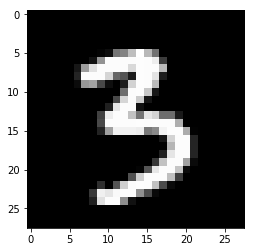

-------------------------------------------------
Using Euclidean distances ....
-------------------------------------------------

Labels of neighbors
[3.0, 3.0, 3.0, 3.0, 3.0]
Predicted Label
3.0
Correct Label
3.0
-------------------------------------------------
Using Cosine distances ....
-------------------------------------------------

Labels of neighbors
[3.0, 3.0, 3.0, 3.0, 3.0]
Predicted Label
3.0
Correct Label
3.0


In [9]:
k_list = [5]
idx = np.random.randint(1, X_test.shape[0]+1)   # Random index from train data

print('-------------------------------------------------')
print('The number ....')
print('-------------------------------------------------')
plt.imshow(np.reshape(X_test[idx], [28, 28]), cmap='gray')
plt.show()
print('-------------------------------------------------')
print('Using Euclidean distances ....')
print('-------------------------------------------------')
for k in k_list:
    find_k_nearest_neighbors(idx, k, distance_matrix=mnist_euclidean_distances, train_labels=y_train, test_labels=y_test)

print('-------------------------------------------------')
print('Using Cosine distances ....')
print('-------------------------------------------------')
for k in k_list:
    find_k_nearest_neighbors(idx, k, distance_matrix=mnist_cosine_distances, train_labels=y_train, test_labels=y_test)

# With normalizing

In [10]:
# Normalize data
norm_X_train = np.divide(X_train, 255)
norm_X_test = np.divide(X_test, 255)

print(norm_X_train.shape)
print(norm_X_test.shape)

(56000, 784)
(14000, 784)


In [11]:
# Euclidean distance matrix
norm_mnist_euclidean_distances = euclidean_distances(norm_X_test, norm_X_train)
print(norm_mnist_euclidean_distances.shape)

(14000, 56000)


In [12]:
# Cosine distance matrix
norm_mnist_cosine_distances = cosine_distances(norm_X_test, norm_X_train)
print(norm_mnist_cosine_distances.shape)

(14000, 56000)


In [13]:
k_list = [3]

print('-------------------------------------------------')
print('Using Euclidean distances ....')
print('-------------------------------------------------')
for k in k_list:
    knn(k, distance_matrix=norm_mnist_euclidean_distances, train_labels=y_train, test_labels=y_test)
    
print('-------------------------------------------------')
print('Using Cosine distances ....')
print('-------------------------------------------------')
for k in k_list:
    knn(k, distance_matrix=norm_mnist_cosine_distances, train_labels=y_train, test_labels=y_test)

-------------------------------------------------
Using Euclidean distances ....
-------------------------------------------------
k=3: 97.4 %
-------------------------------------------------
Using Cosine distances ....
-------------------------------------------------
k=3: 97.8 %


-------------------------------------------------
The number ....
-------------------------------------------------


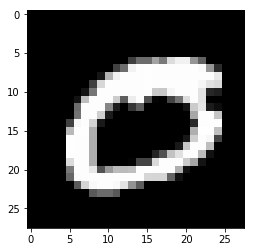

-------------------------------------------------
Using Euclidean distances ....
-------------------------------------------------

Labels of neighbors
[0.0, 0.0, 0.0, 0.0, 0.0]
Predicted Label
0.0
Correct Label
0.0
-------------------------------------------------
Using Cosine distances ....
-------------------------------------------------

Labels of neighbors
[0.0, 0.0, 0.0, 0.0, 0.0]
Predicted Label
0.0
Correct Label
0.0


In [14]:
k_list = [5]
idx = np.random.randint(1, X_test.shape[0]+1)   # Random index from train data

print('-------------------------------------------------')
print('The number ....')
print('-------------------------------------------------')
plt.imshow(np.reshape(X_test[idx], [28, 28]), cmap='gray')
plt.show()
print('-------------------------------------------------')
print('Using Euclidean distances ....')
print('-------------------------------------------------')
for k in k_list:
    find_k_nearest_neighbors(idx, k, distance_matrix=norm_mnist_euclidean_distances, train_labels=y_train, test_labels=y_test)

print('-------------------------------------------------')
print('Using Cosine distances ....')
print('-------------------------------------------------')
for k in k_list:
    find_k_nearest_neighbors(idx, k, distance_matrix=norm_mnist_cosine_distances, train_labels=y_train, test_labels=y_test)